<a href="https://colab.research.google.com/github/OBB-2199/EscapeEarth/blob/main/Interns/Olivia/BLSresults.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## mount google drive to access files

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#opening bls
#putting them in one data frame
#generate histograms for each of the statistics 

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
!pip install lightkurve==1.9.0
import lightkurve as lk
import pandas as pd
import sys
sys.path.append('/content/gdrive/My Drive/EscapeEarthData/')
import OpenAndPlot as op
import LCAnalysis_test as lca

In [ ]:
#format data for class
tic = 7582633
sector = 14
data = [tic,sector]

#initiate the class
class_obj = lca.LCAnalysis(data)

#test fold class method
period = 0.299916
folded_plot = class_obj.folded(period)
folded_plot

In [ ]:
stats_sec14 = pd.read_csv('/content/gdrive/My Drive/EscapeEarthData/BLS_results/bls_statsdf_sec14.csv')
stats_sec14

#drop index column
stats_sec14 = stats_sec14.drop(columns=['Unnamed: 0'])
stats_sec14

# make an array of sector values that is the same length as the df we'll add to 
col_for_14_1 = np.repeat(14, len(stats_sec14))
# now add that array to df_1
stats_sec14['Sector'] = col_for_14_1
# see the changes
stats_sec14

,TIC,Period,Duration,Transit Time,Power,Depth,Sector
0,7582633,0.299916,0.298,0.157,0,0.000398,14
1,7582634,0.299916,0.298,0.161,0,0.000534,14
2,7583285,0.301269,0.298,0.162,1,0.000406,14
3,7584971,0.301269,0.298,0.157,1,0.000111,14
4,7585322,0.299916,0.298,0.154,0,0.000102,14
...,...,...,...,...,...,...,...
15665,1971834278,0.303994,0.298,0.160,3,0.000060,14
15666,1972296808,0.299916,0.298,0.156,0,0.000047,14
15667,1980968952,0.299916,0.298,0.156,0,0.000105,14
15668,1980968953,0.299916,0.298,0.156,0,0.000133,14


In [ ]:
stats_sec15 = pd.read_csv('/content/gdrive/My Drive/EscapeEarthData/BLS_results/bls_statsdf_sec15.csv')
stats_sec15

#drop index column
stats_sec15 = stats_sec15.drop(columns=['Unnamed: 0'])
stats_sec15

# make an array of sector values that is the same length as the df we'll add to 
col_for_15_1 = np.repeat(15, len(stats_sec15))
# now add that array to df_1
stats_sec15['Sector'] = col_for_15_1
# see the changes
stats_sec15

,TIC,Period,Duration,Transit Time,Power,Depth,Sector
0,10757120,0.301269,0.298,0.162,1,0.004719,15
1,10759029,0.301269,0.298,0.162,1,0.004158,15
2,10849428,0.301269,0.298,0.152,1,0.001682,15
3,10856385,0.302629,0.298,0.163,2,0.006003,15
4,10984531,0.303994,0.298,0.153,3,0.033589,15
...,...,...,...,...,...,...,...
16360,2002418280,0.299916,0.298,0.155,0,0.000474,15
16361,2002418281,0.299916,0.298,0.159,0,0.000462,15
16362,2002486147,0.301269,0.298,0.161,1,0.000159,15
16363,2003139541,0.299916,0.298,0.158,0,0.000235,15


In [ ]:
#sanity check using lenghts of dfs
print('Length of df-1: {} \nLength of df-2: {}'.format(len(stats_sec14), len(stats_sec15)))
print('Expected total length: {}'.format( len(stats_sec14) + len(stats_sec15) ))
#does the appending --check that lenght of main_df matches expected total length
all_stats = stats_sec14.append(stats_sec15)
all_stats = all_stats.reset_index(drop=True)
print('Actual total lenght: {}'.format(len(all_stats)))
all_stats

Length of df-1: 15670 
Length of df-2: 16365
Expected total length: 32035
Actual total lenght: 32035


,TIC,Period,Duration,Transit Time,Power,Depth,Sector
0,7582633,0.299916,0.298,0.157,0,0.000398,14
1,7582634,0.299916,0.298,0.161,0,0.000534,14
2,7583285,0.301269,0.298,0.162,1,0.000406,14
3,7584971,0.301269,0.298,0.157,1,0.000111,14
4,7585322,0.299916,0.298,0.154,0,0.000102,14
...,...,...,...,...,...,...,...
32030,2002418280,0.299916,0.298,0.155,0,0.000474,15
32031,2002418281,0.299916,0.298,0.159,0,0.000462,15
32032,2002486147,0.301269,0.298,0.161,1,0.000159,15
32033,2003139541,0.299916,0.298,0.158,0,0.000235,15


In [ ]:
all_stats[all_stats['TIC']==26489741]

,TIC,Period,Duration,Transit Time,Power,Depth,Sector
405,26489741,2.465579,0.138,0.132,468,0.158800,14
16040,26489741,2.465579,0.234,1.724,468,0.079096,15


In [ ]:
#make a cut

#Previous Cuts Tested
#all_stats['Power'] >990
#all_stats['Duration'] < .1 – indexes 1-119 (inclusive)
#all_stats['Transit Time'] > 5 – indexes 1-9 & 130-139
#all_stats['Depth'] > .5 – indexes 1-11

#threshold
cut_1 = all_stats['Duration'] < .1
all_stats_aftercut = all_stats[cut_1]
print('New Length:', len(all_stats_aftercut))
all_stats_aftercut

New Length: 248


,TIC,Period,Duration,Transit Time,Power,Depth,Sector
169,14323558,9.557853,0.010,8.86000,769,0.088655,14
422,26584043,0.445693,0.074,0.40000,88,0.003599,14
425,26656583,0.528840,0.074,0.50100,126,0.138116,14
556,27843942,0.761510,0.074,0.72200,207,0.203324,14
592,28230919,4.887335,0.074,3.86000,620,0.002252,14
...,...,...,...,...,...,...,...
31340,441732151,2.096720,0.042,0.73900,432,0.002351,15
31499,441804888,1.367161,0.074,1.20700,337,0.054683,15
31576,445859771,4.630337,0.042,0.98600,608,0.002255,15
31603,452587442,11.495120,0.010,0.00488,810,0.001692,15


In [ ]:
#format info for Open and Plot class

#[tic,sector]
data_for_class = all_stats_aftercut[['TIC','Sector']].to_numpy()
period_for_classmethod = all_stats_aftercut['Period'].to_numpy()
#data_for_class

[375534411        14] 14.076234280494434
[377307592        14] 1.1944587911344275
[396779850        14] 13.45664938461192
[403786081        14] 14.526840601266745
[406951407        14] 0.3623331821087744
[408474216        14] 0.9666923644842408
[416195870        14] 2.7468683024559586
[416266231        14] 0.4357739461212339
[417387661        14] 9.219783451162977
[441734144        14] 0.3252289441316287


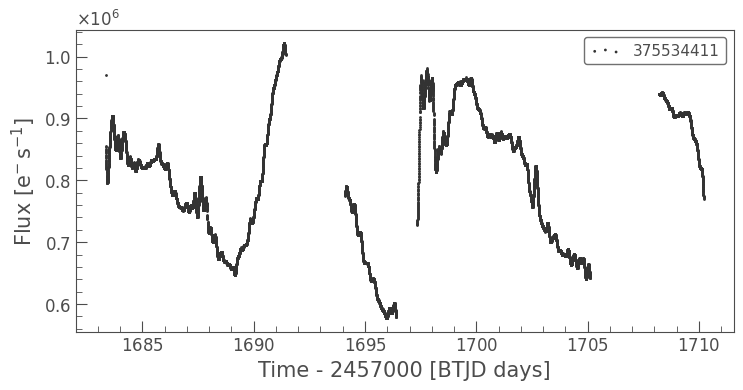

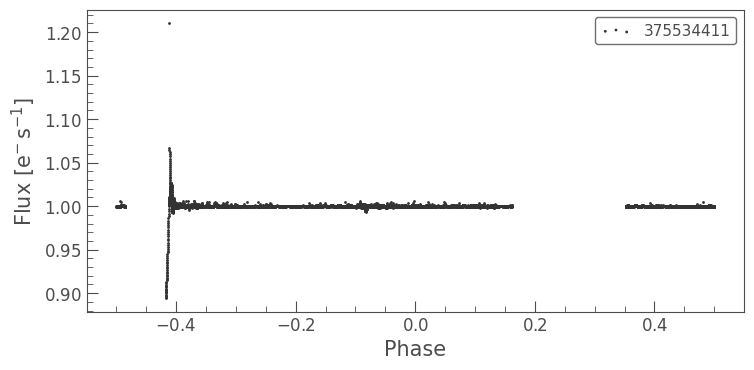

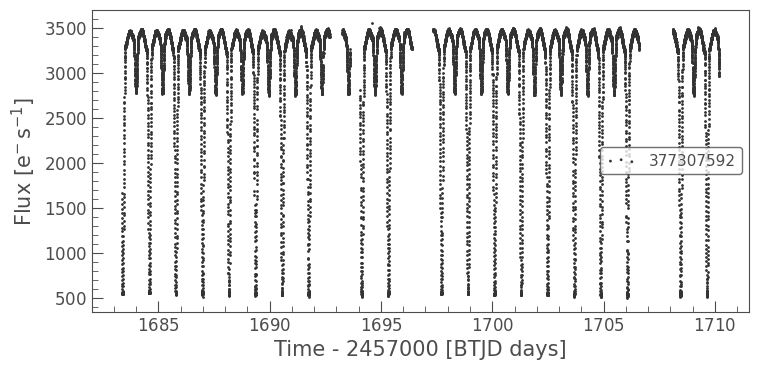

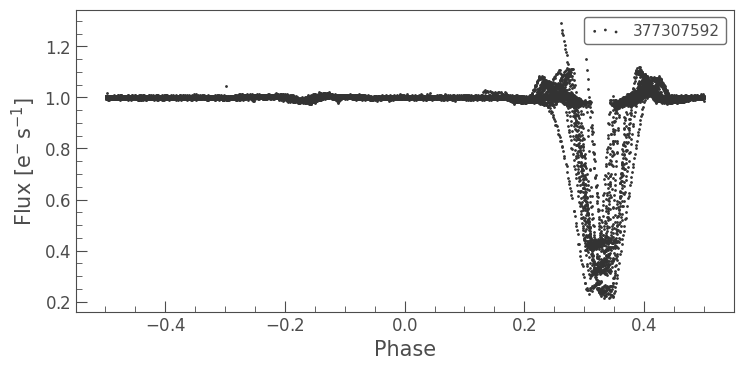

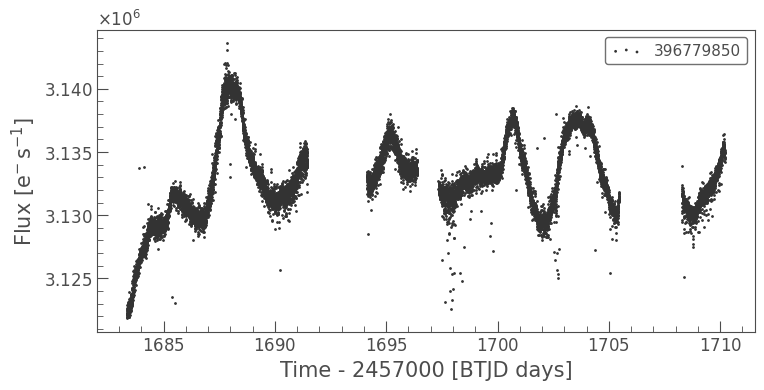

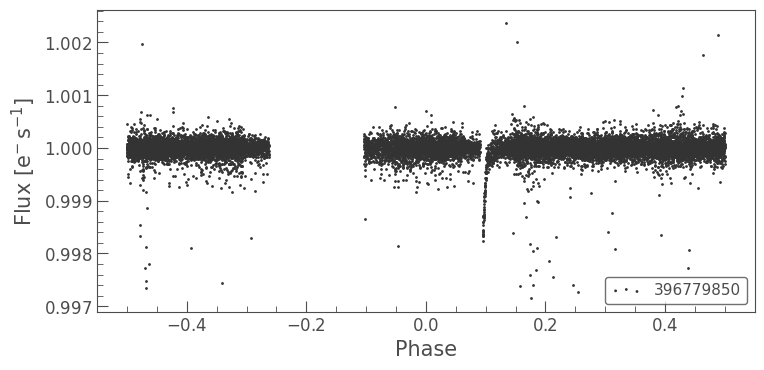

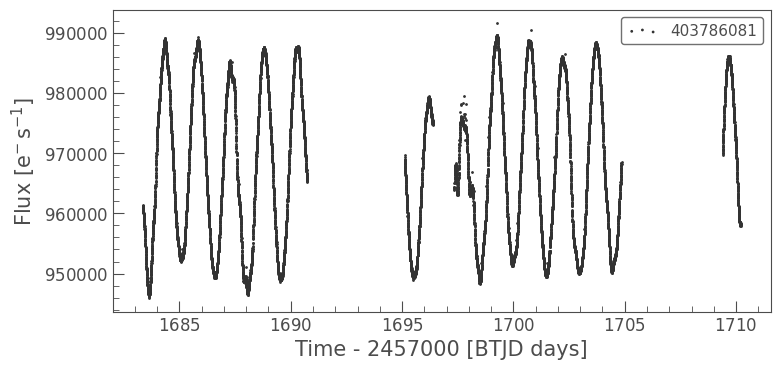

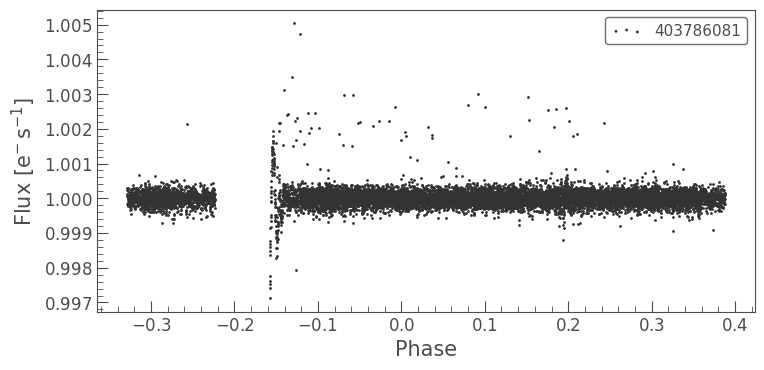

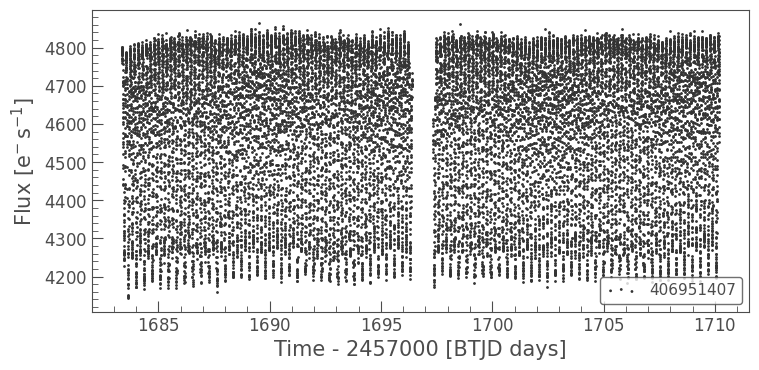

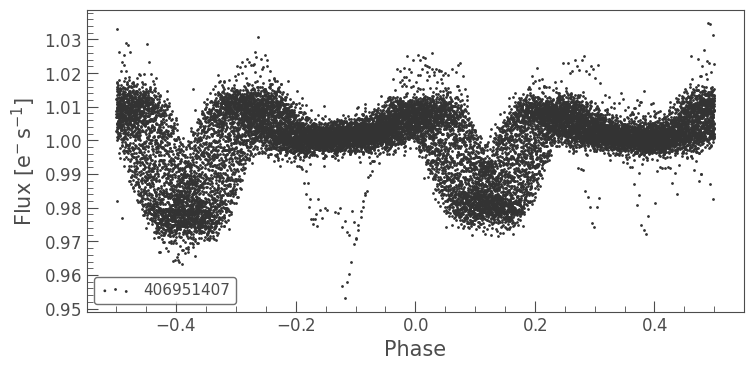

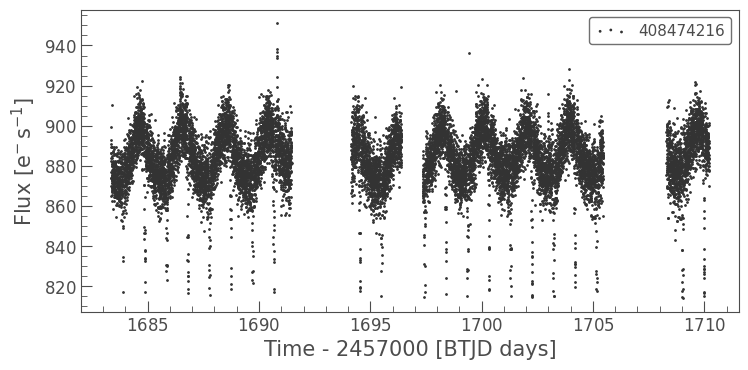

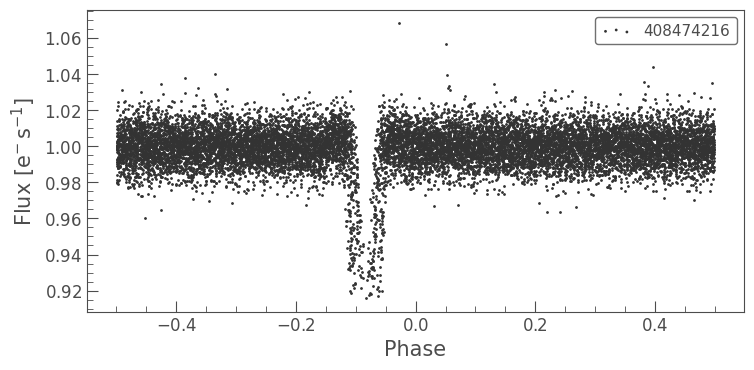

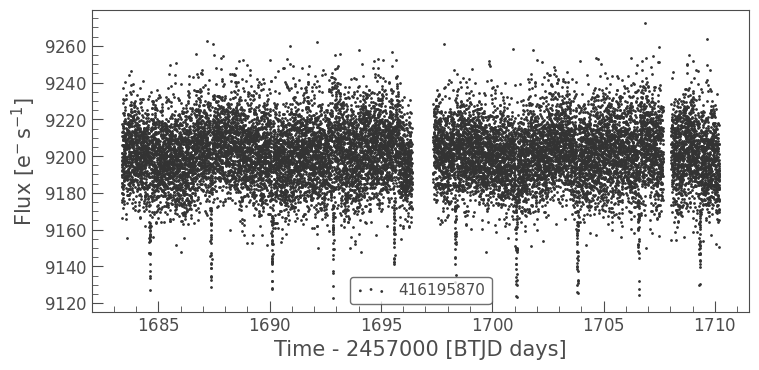

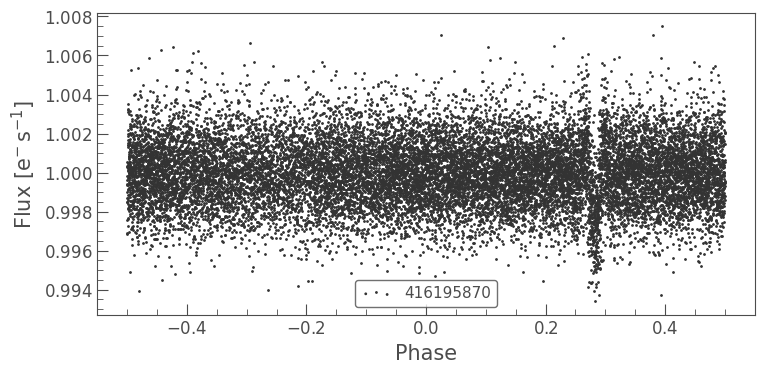

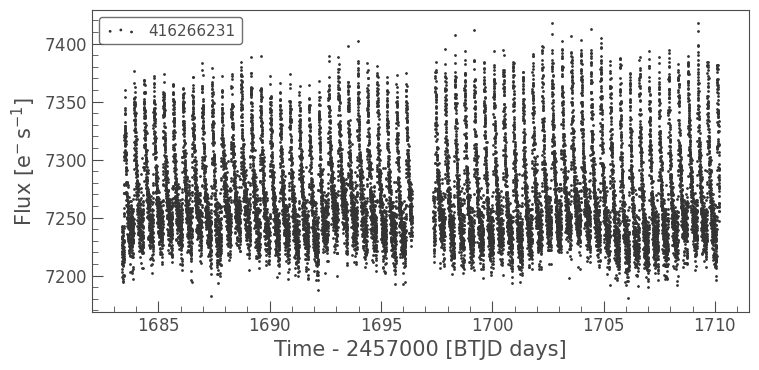

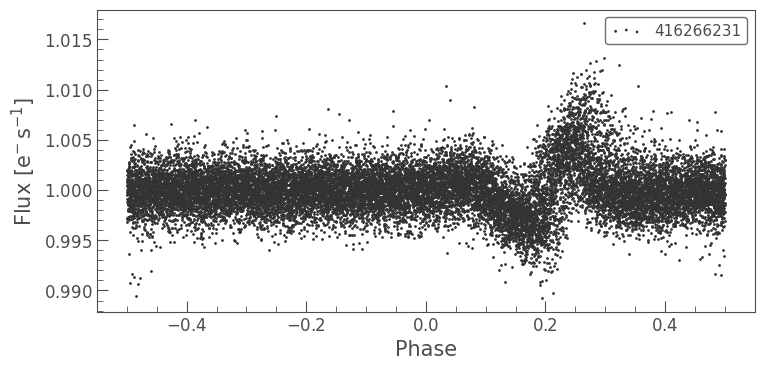

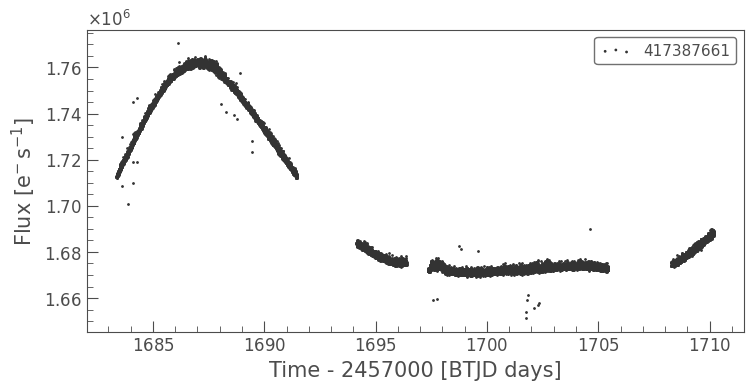

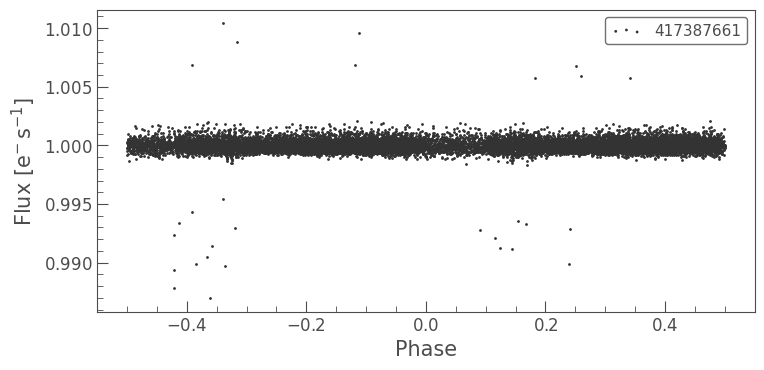

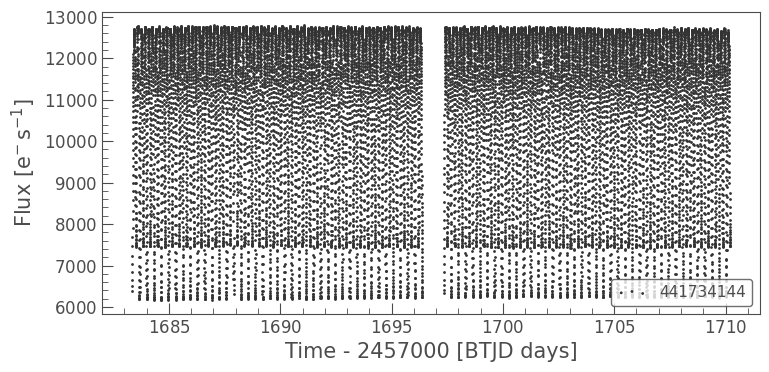

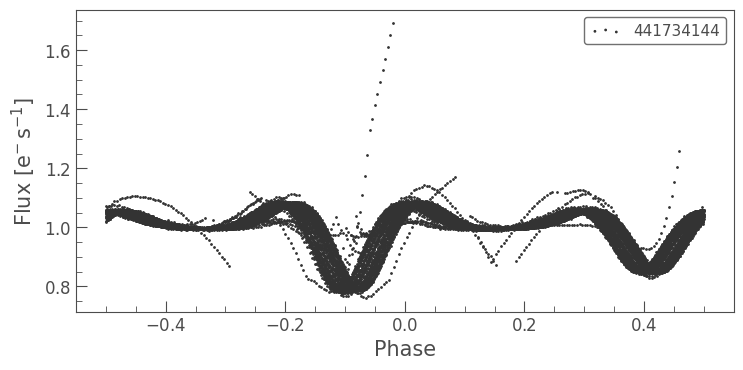

In [ ]:
%matplotlib inline 
#plot light curves using OpenAndPlot class

idx_1 = 110
idx_2 = 120


for i,j in zip(data_for_class[idx_1:idx_2],period_for_classmethod[idx_1:idx_2]): #[inclusive,exclusive] index range
  data_list = list(i) #change from array to list so the class accepts it
  # "break" cuts the for loop, only runs once until it reaches this point
  #initialize the class
  class_obj = op.OpenAndPlot(data_list)
  lca_class_obj = lca.LCAnalysis(data_list) 
  #plot
  class_obj.plot_cleaned_lc()
  print(i,j)
  lca_class_obj.folded(j)
  #break


 https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html


In [ ]:
# %matplotlib inline
# plt.hist(all_stats['Period'])
# plt.title('Periods')

In [ ]:
# %matplotlib inline
# plt.hist(all_stats['Duration'])
# plt.title('Duration')

In [ ]:
# %matplotlib inline
# plt.hist(all_stats['Transit Time'])
# plt.title('Transit Time')
# #plt.bins  

In [ ]:
# %matplotlib inline
# plt.hist(all_stats['Power'])
# plt.title('Power')

In [ ]:
# %matplotlib inline
# plt.hist(all_stats['Depth'])
# plt.title('Depth')